# **1.	Based-Model Analysis:**
The Value Iteration algorithm used in this implementation is a model-based approach to reinforcement learning. In model-based reinforcement learning, the agent has access to the environment's dynamics model, which provides information about the transition probabilities and rewards associated with each action in each state.
During the iteration process, the algorithm utilizes the environment's dynamics model to update the value function based on the expected rewards and transitions to future states. This model-based approach allows the agent to efficiently explore the state space and learn an optimal policy without directly interacting with the environment.
Therefore, the Value Iteration algorithm employed here is model-based, as it relies on the knowledge of the environment's dynamics to iteratively improve the value function and derive the optimal policy.

In [24]:
# Import necessary libraries
!pip install gym
import numpy as np
import gym
import time
import random
import gym
import numpy as np
import matplotlib.pyplot as plt
from collections import namedtuple, deque
import numpy as np

In [41]:


class MountainCarValueIteration:
    def __init__(self, env, discount_factor=0.9, theta=0.0001, max_steps=500):
        self.env = env
        self.discount_factor = discount_factor
        self.theta = theta
        self.max_steps = max_steps
        self.num_states = (self.env.observation_space.high - self.env.observation_space.low) * np.array([10, 100])
        self.num_states = np.round(self.num_states, 0).astype(int) + 1
        self.V = np.zeros((self.num_states[0], self.num_states[1], self.env.action_space.n))

    def discretize_state(self, state):
        state_adj = (state - self.env.observation_space.low) * np.array([10, 100])
        state_adj = np.round(state_adj, 0).astype(int)
        return state_adj

    def value_iteration(self):
        for _ in range(self.max_steps):
            delta = 0
            for position in range(self.num_states[0]):
                for velocity in range(self.num_states[1]):
                    for action in range(self.env.action_space.n):
                        state = np.array([position, velocity])
                        self.env.reset()  # Reset the environment
                        next_state, reward, _, _ = self.env.step(action)
                        next_state_adj = self.discretize_state(next_state)
                        td_target = reward + self.discount_factor * np.max(self.V[next_state_adj[0], next_state_adj[1]])
                        td_error = td_target - self.V[position, velocity, action]
                        self.V[position, velocity, action] += td_error
                        delta = max(delta, np.abs(td_error))
            if delta < self.theta:
                break

    def extract_policy(self):
        policy = np.zeros((self.num_states[0], self.num_states[1]))
        for position in range(self.num_states[0]):
            for velocity in range(self.num_states[1]):
                policy[position, velocity] = np.argmax(self.V[position, velocity])
        return policy

def simulate(env, policy, max_steps=500):
    state = env.reset()
    for step in range(max_steps):
        state_adj = agent.discretize_state(state)
        action = policy[state_adj[0], state_adj[1]]
        state, reward, done, _ = env.step(int(action))
        if done:
            print(f"Goal reached in {step+1} steps.")
            return
    print(f"Goal not reached in {max_steps} steps.")

# Create the Mountain Car environment
env = gym.make('MountainCar-v0')

# Initialize the value iteration agent
agent = MountainCarValueIteration(env)

# Perform value iteration to calculate optimal Q-values
agent.value_iteration()

# Extract the optimal policy
optimal_policy = agent.extract_policy()

# Simulate the environment with the optimal policy
simulate(env, optimal_policy)
print("Optimal policy:")
print(optimal_policy)


Goal reached in 200 steps.
Optimal policy:
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 2. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 2. 0. 1. 0.]
 [1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 2. 1. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 2. 0. 0. 0. 1. 0. 0. 0. 0. 2. 0. 0.]
 [0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
 [1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 2. 1. 0. 0. 0.]]


## **Exploring the Mountain Car Environment with SARSA: A Model-Free Reinforcement Learning Approach**
The provided code implements the SARSA algorithm in the Mountain Car environment, a classic problem in reinforcement learning. SARSA is a model-free approach, meaning it does not require knowledge of the environment's dynamics, such as transition probabilities and rewards. Instead, it learns directly from interactions with the environment.

In this implementation, the continuous state space of the Mountain Car environment is discretized into a grid of 20x20 states, enabling SARSA to operate in a discrete state space. This discretization allows SARSA to handle the continuous nature of the environment and learn an optimal policy efficiently.

During each episode, SARSA iteratively updates the action-value function Q based on the observed rewards and state transitions. It follows an epsilon-greedy policy to balance exploration and exploitation, with epsilon decreasing over time to prioritize exploitation as learning progresses.

The algorithm aims to maximize the cumulative reward obtained by the agent over multiple episodes. The plot generated at the end illustrates the average cumulative reward obtained per episode during the learning process, providing insights into SARSA's performance in the Mountain Car environment.

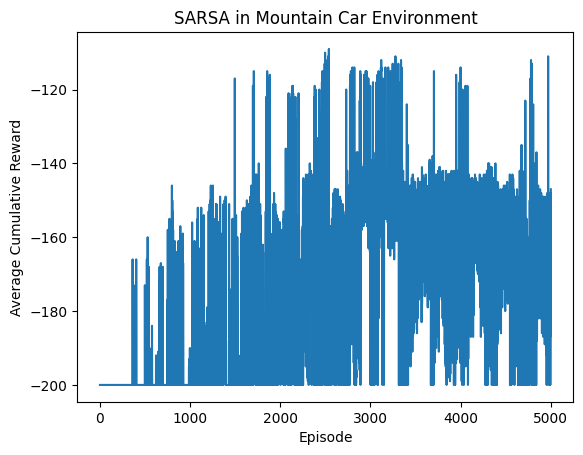

In [43]:



# Discretize the continuous state space
def discretize_state(state, num_states):
    min_vals = env.observation_space.low
    max_vals = env.observation_space.high
    state_indices = ((state - min_vals) / (max_vals - min_vals) * num_states).astype(int)
    return tuple(np.clip(state_indices, 0, num_states - 1))

# SARSA Algorithm
def sarsa(env, num_episodes, learning_rate, discount_factor, epsilon):
    num_states = 20  # Number of discrete states for each dimension
    num_actions = env.action_space.n
    Q = np.zeros((num_states, num_states, num_actions))
    rewards_per_episode = []

    for episode in range(num_episodes):
        state = discretize_state(env.reset(), num_states)
        action = epsilon_greedy_policy(Q, state, epsilon)
        total_reward = 0

        while True:
            next_state, reward, done, _ = env.step(action)
            next_state = discretize_state(next_state, num_states)
            next_action = epsilon_greedy_policy(Q, next_state, epsilon)
            Q[state][action] += learning_rate * (reward + discount_factor * Q[next_state][next_action] - Q[state][action])
            total_reward += reward

            if done:
                break

            state = next_state
            action = next_action

        rewards_per_episode.append(total_reward)
        epsilon *= 0.99  # Decrease epsilon

    return Q, rewards_per_episode

def epsilon_greedy_policy(Q, state, epsilon):
    if np.random.rand() < epsilon:
        return np.random.randint(len(Q[state]))
    else:
        return np.argmax(Q[state])

# Set up the Mountain Car environment
env = gym.make('MountainCar-v0')

# Parameters
num_episodes = 5000
learning_rate = 0.1
discount_factor = 0.9
epsilon = 1.0  # Initial epsilon value

# SARSA
Q_sarsa, rewards_sarsa = sarsa(env, num_episodes, learning_rate, discount_factor, epsilon)

# Plot average cumulative rewards over episodes for SARSA
plt.plot(np.arange(1, num_episodes + 1), rewards_sarsa)
plt.xlabel('Episode')
plt.ylabel('Average Cumulative Reward')
plt.title('SARSA in Mountain Car Environment')
plt.show()


## **Title: Examining the Mountain Car Environment with Q-learning: A Model-Free Reinforcement Learning Approach**

In this implementation, Q-learning algorithm is utilized to address the Mountain Car problem. The continuous state space of the environment is discretized into a grid with 20x20 states, enabling Q-learning to operate efficiently in a tabular form. Q-learning is a model-free reinforcement learning algorithm that learns an optimal action-value function directly from observed transitions and rewards.

The discretize_state function maps the continuous state space to discrete states, facilitating the operation of Q-learning. Within the q_learning function, the agent iteratively updates its Q-values based on observed transitions and rewards using the Bellman equation. It follows an epsilon-greedy policy, which gradually shifts from exploration to exploitation as epsilon decreases over episodes.

The Q-learning algorithm is executed over 5000 episodes, with a learning rate of 0.1 and a discount factor of 0.9. The resulting Q-values represent the learned action-values, indicating the expected cumulative rewards for each action taken in each state. The average cumulative reward per episode is plotted to visualize the learning progress over time.

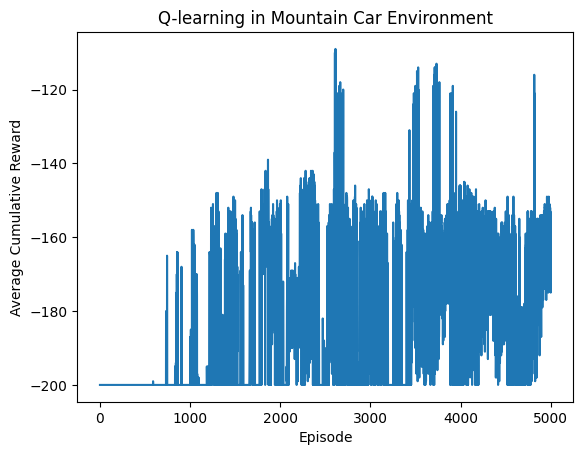

In [44]:


# Discretize the continuous state space
def discretize_state(state, num_states):
    min_vals = env.observation_space.low
    max_vals = env.observation_space.high
    state_indices = ((state - min_vals) / (max_vals - min_vals) * num_states).astype(int)
    return tuple(np.clip(state_indices, 0, num_states - 1))

# Q-learning Algorithm
def q_learning(env, num_episodes, learning_rate, discount_factor, epsilon):
    num_states = 20  # Number of discrete states for each dimension
    num_actions = env.action_space.n
    Q = np.zeros((num_states, num_states, num_actions))
    rewards_per_episode = []

    for episode in range(num_episodes):
        state = discretize_state(env.reset(), num_states)
        total_reward = 0

        while True:
            action = epsilon_greedy_policy(Q, state, epsilon)
            next_state, reward, done, _ = env.step(action)
            next_state = discretize_state(next_state, num_states)
            td_target = reward + discount_factor * np.max(Q[next_state])
            td_error = td_target - Q[state][action]
            Q[state][action] += learning_rate * td_error
            total_reward += reward

            if done:
                break

            state = next_state

        rewards_per_episode.append(total_reward)
        epsilon *= 0.99  # Decrease epsilon

    return Q, rewards_per_episode

def epsilon_greedy_policy(Q, state, epsilon):
    if np.random.rand() < epsilon:
        return np.random.randint(len(Q[state]))
    else:
        return np.argmax(Q[state])

# Set up the Mountain Car environment
env = gym.make('MountainCar-v0')

# Parameters
num_episodes = 5000
learning_rate = 0.1
discount_factor = 0.9
epsilon = 1.0  # Initial epsilon value

# Q-learning
Q_qlearning, rewards_qlearning = q_learning(env, num_episodes, learning_rate, discount_factor, epsilon)

# Plot average cumulative rewards over episodes for Q-learning
plt.plot(np.arange(1, num_episodes + 1), rewards_qlearning)
plt.xlabel('Episode')
plt.ylabel('Average Cumulative Reward')
plt.title('Q-learning in Mountain Car Environment')
plt.show()
